In [86]:
import matplotlib.pyplot as plt
import numpy as np
from random import gauss

In [87]:
t = np.arange(1, 200, 0.1)

Text(0, 0.5, 'Position')

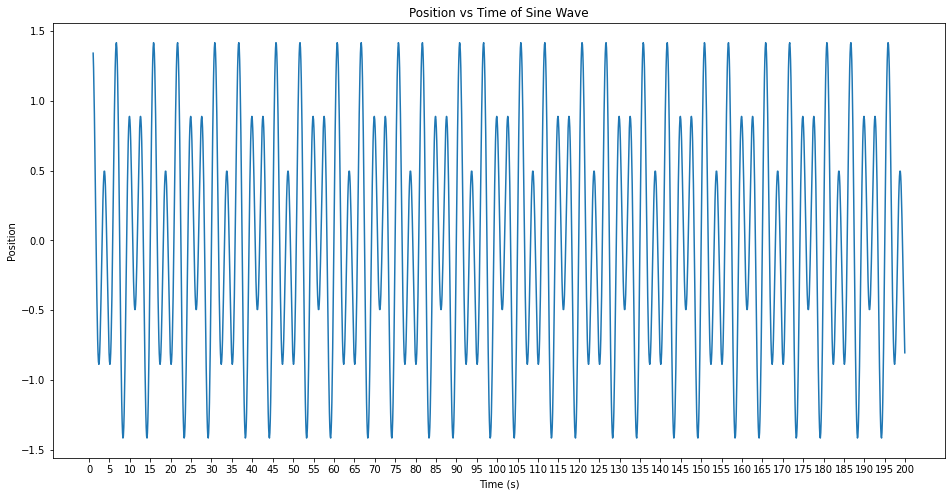

In [88]:
y1 = np.sin(2*np.pi*t/3)
y2 = 0.5*np.sin(2*np.pi*t/5)
noise=[gauss(0,1) for _usused_variable in range(len(y1+y2))]
y = y1+y2+noise

plt.figure(figsize=(16,8))
plt.xticks(np.arange(0,205,5))
plt.plot(t,y1+y2)
plt.title("Position vs Time of Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Position")

Text(0, 0.5, 'Amplitude')

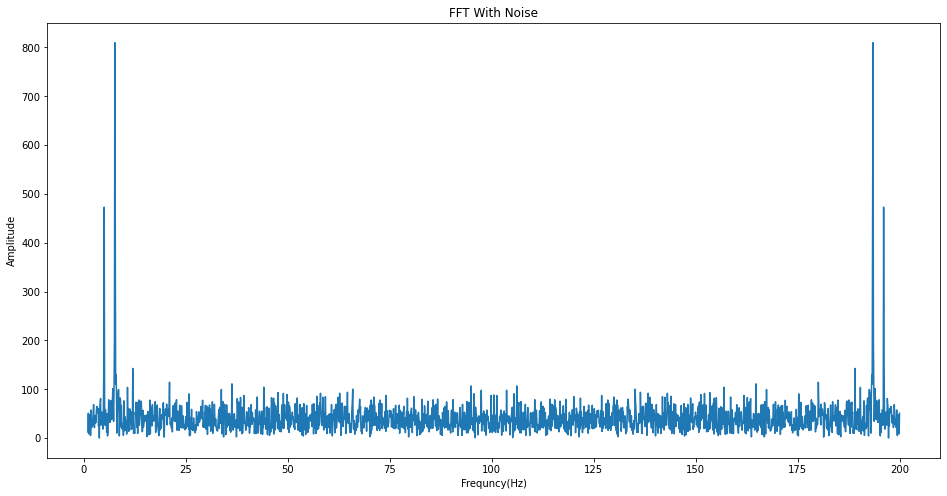

In [89]:
plt.figure(figsize=(16,8))

z1 = np.fft.fft(y)
z2 = np.fft.fft(y1+y2)
plt.plot(t,np.abs(z1))
plt.title("FFT With Noise")
plt.xlabel("Frequncy(Hz)")
plt.ylabel("Amplitude")

[0.01255844 0.0509792  0.00872368 ... 0.03101085 0.00872368 0.0509792 ]


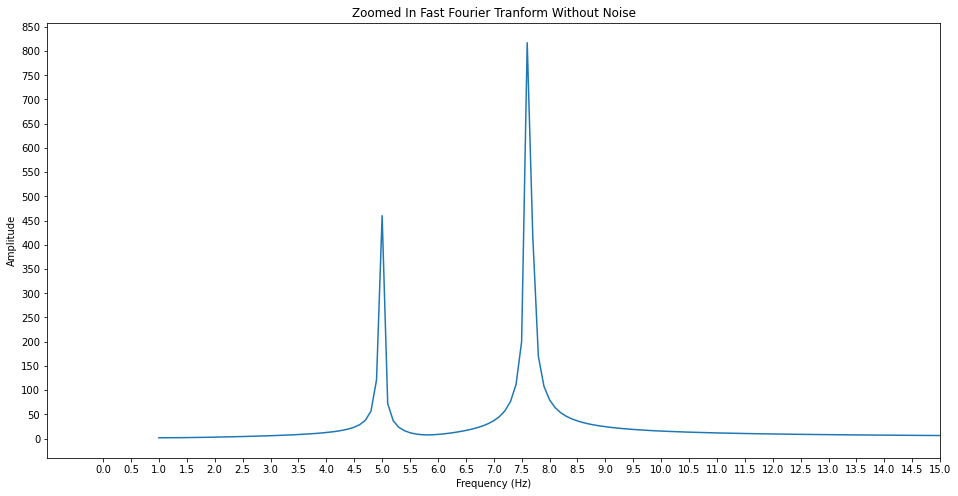

In [92]:
plt.figure(figsize=(16,8))

plt.yticks(np.arange(0,900,50))
plt.xticks(np.arange(0,205,0.5))
plt.xlim(-1, 15)
plt.plot(t,np.abs(z2))
plt.title("Zoomed In Fast Fourier Tranform Without Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

amplitudes = 2/2000 *np.abs(z1)
print(amplitudes)

EXERCISE 2

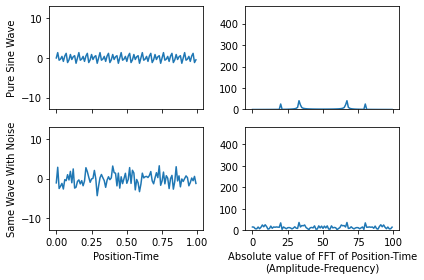

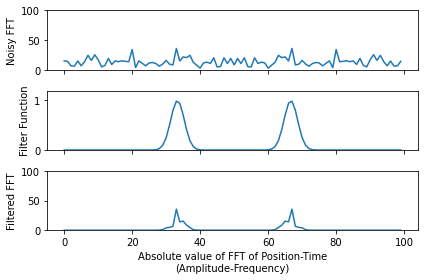

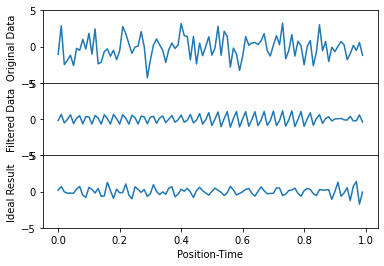

In [41]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 25 13:53:25 2017

@author: Brian
"""

save=True # if True then we save images as files

from random import gauss
import matplotlib.pyplot as plt
import numpy as np

N=100   # N is how many data points we will have in our sine wave

time=np.arange(N)

A1=1   # wave amplitude
T1=3.  # wave period
y1=A1*np.sin(2.*np.pi*time/T1)

A2=0.5
T2=5
y2=A2*np.sin(2.*np.pi*time/T2)

y=y1+y2

noise_amp=A1+A2/2. 
# set the amplitude of the noise relative to sine's amp

"""
i=0
noise=[]
while i < N:
    noise.append(gauss(0,noise_amp))
    i+=1
"""
noise=[gauss(0,noise_amp) for _usused_variable in range(len(y))]
# this line, and the commented block above, do exactly the same thing

x=y+noise
#x=y
# y is our pure sine wave, x is y with noise added

z1=np.fft.fft(y)
z2=np.fft.fft(x)
# take the Fast Fourier Transforms of both x and y

fig, ( (ax1,ax2), (ax3,ax4) ) = plt.subplots(2,2,sharex='col',sharey='col')
""" 
this setups up a 2x2 array of graphs, based on the first two arguments
of plt.subplots()

the sharex and sharey force the x- and y-axes to be the same for each 
column
"""

ax1.plot(time/N,y)
ax2.plot(np.abs(z1))
ax3.plot(time/N,x)
ax4.plot(np.abs(z2))
""" 
our graphs are now plotted

(ax1,ax2) is a list of figures which are the top row of figures

therefore ax1 is top-left and ax2 is top-right

we plot the position-time graphs rescaled by a factor of N so that
the FFT x-axis agrees with the frequency we could measure from the
position-time graph. by default, both graphs use "data-point number"
on their x-axes, so would go 0 to 200 since N=200.
"""

fig.subplots_adjust(hspace=0)
# remove the horizontal space between the top and bottom row
ax3.set_xlabel('Position-Time')
ax4.set_xlabel('Absolute value of FFT of Position-Time\n(Amplitude-Frequency)')
ax3.set_ylim(-13,13)
ax4.set_ylim(0,480)
ax1.set_ylabel('Pure Sine Wave')
ax3.set_ylabel('Same Wave With Noise')

mydpi=300
plt.tight_layout()

if (save): plt.savefig('SingleWaveAndNoiseWithFFT.png',dpi=mydpi)
plt.show()
"""
plt.show() displays the graph on your computer

plt.savefig will save the graph as a .png file, useful for including
in your report so you don't have to cut-and-paste
"""


M=len(z2)
freq=np.arange(M)  # frequency values, like time is the time values
width=8  # width=2*sigma**2 where sigma is the standard deviation
peak=100/3    # ideal value is approximately N/T1

filter_function=(np.exp(-(freq-peak)**2/width)+np.exp(-(freq+peak-M)**2/width))
z_filtered=z2*filter_function
"""
we choose Gaussian filter functions, fairly wide, with
one peak per spike in our FFT graph

we eyeballed the FFT graph to figure out decent values of 
peak and width for our filter function

a larger width value is more forgiving if your peak value
is slightly off

making width a smaller value, and fixing the value of peak,
will give us a better final result
"""

fig, (ax1,ax2,ax3)=plt.subplots(3,1,sharex='col')
# this gives us an array of 3 graphs, vertically aligned
ax1.plot(np.abs(z2))  
ax2.plot(np.abs(filter_function))
ax3.plot(np.abs(z_filtered))
"""
note that in general, the fft is a complex function, hence we plot
the absolute value of it. in our case, the fft is real, but the
result is both positive and negative, and the absolute value is still
easier to understand

if we plotted (abs(fft))**2, that would be called the power spectra
"""

fig.subplots_adjust(hspace=0)
ax1.set_ylim(0,100)
ax2.set_ylim(0,1.2)
ax3.set_ylim(0,100)
ax1.set_ylabel('Noisy FFT')
ax2.set_ylabel('Filter Function')
ax3.set_ylabel('Filtered FFT')
ax3.set_xlabel('Absolute value of FFT of Position-Time\n(Amplitude-Frequency)')

plt.tight_layout() 
""" 
the \n in our xlabel does not save to file well without the
tight_layout() command
"""

if(save): plt.savefig('FilteringProcess.png',dpi=mydpi)
plt.show()

cleaned=np.fft.ifft(z_filtered)
"""
ifft is the inverse FFT algorithm

it converts an fft graph back into a sinusoidal graph

we took the data, took the fft, used a filter function 
to eliminate most of the noise, then took the inverse fft
to get our "cleaned" version of the original data
"""

fig, (ax1,ax2,ax3)=plt.subplots(3,1,sharex='col',sharey='col')
ax1.plot(time/N,x)
ax2.plot(time/N,np.real(cleaned))
ax3.plot(time/N,y-np.real(cleaned))
"""
we plot the real part of our cleaned data - but since the 
original data was real, the result of our tinkering should 
be real so we don't lose anything by doing this

if you don't explicitly plot the real part, python will 
do it anyway and give you a warning message about only
plotting the real part of a complex number. so really, 
it's just getting rid of a pesky warning message
"""

fig.subplots_adjust(hspace=0)
ax1.set_ylim(-5,5)
ax1.set_ylabel('Original Data')
ax2.set_ylabel('Filtered Data')
ax3.set_ylabel('Ideal Result')
ax3.set_xlabel('Position-Time')

if(save): plt.savefig('SingleWaveAndNoiseFFT.png',dpi=mydpi)
plt.show()

EXERCISE 3

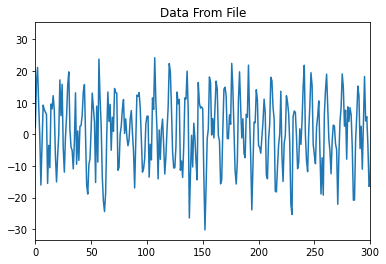

There are 2000 data points in total, only drawing the first 300


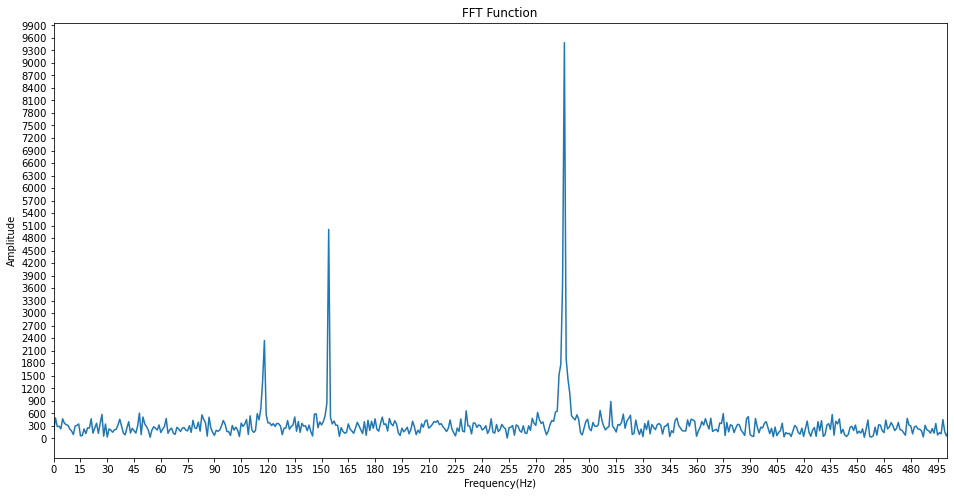

[1.72763633 4.88996827 2.81362247 ... 2.89588675 2.81362247 4.88996827]


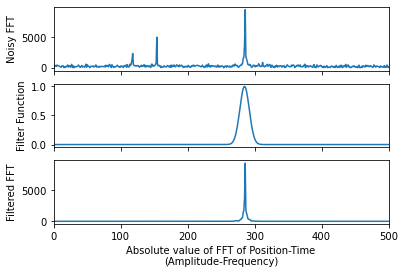

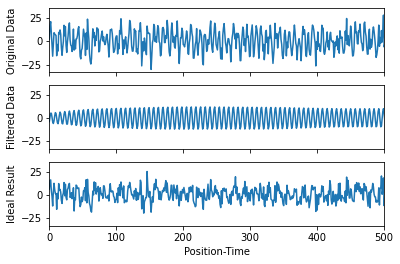

In [84]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 30 15:35:35 2017

@author: Brian
"""

import pickle

with open('noisy_sine_wave','rb') as file:
    data_from_file=pickle.load(file)
"""
the above few lines makes an array called data_from_file which contains
a noisy sine wave as long as you downloaded the file "noisy_sine_wave" 
and put it in the same directory as this python file

pickle is a Python package which nicely saves data to files. it can be
a little tricky when you save lots of data, but this file only has one
object (an array) saved so it is pretty easy
"""

import matplotlib.pyplot as plt

plt.plot(data_from_file)
xmax=300
plt.xlim(0,xmax)
plt.title("Data From File")
plt.show()

number=len(data_from_file)
message="There are " + \
        str(number) + \
        " data points in total, only drawing the first " + \
        str(xmax)
print(message)

f = np.fft.fft(data_from_file, number)
M=len(f)
freq=np.arange(M)  # frequency values, like time is the time values
width=100  # width=2*sigma**2 where sigma is the standard deviation
peak=285   # ideal value is approximately N/T1

filter_function=(np.exp(-(freq-peak)**2/width)+np.exp(-(freq+peak-M)**2/width))
z_filtered=f*filter_function

cleaned = np.fft.ifft(z_filtered)

plt.figure(figsize=(16,8))
plt.xlim(0,500)
plt.yticks(np.arange(0,10000,300))
plt.xticks(np.arange(0,500,15))
plt.plot(np.abs(f))
plt.title("FFT Function")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.show()

fig, (ax1,ax2,ax3)=plt.subplots(3,1,sharex='col')
# this gives us an array of 3 graphs, vertically aligned
ax1.plot(np.abs(f))  
ax2.plot(np.abs(filter_function))
ax3.plot(np.abs(z_filtered))

ax1.set_xlim(0,500)
ax2.set_xlim(0,500)
ax3.set_xlim(0,500)

ax1.set_ylabel('Noisy FFT')
ax2.set_ylabel('Filter Function')
ax3.set_ylabel('Filtered FFT')
ax3.set_xlabel('Absolute value of FFT of Position-Time\n(Amplitude-Frequency)')

fig, (ax1,ax2,ax3)=plt.subplots(3,1,sharex='col',sharey='col')
ax1.plot(data_from_file)
ax2.plot(np.real(cleaned))
ax3.plot(data_from_file-np.real(cleaned))

ax1.set_xlim(0,500)
ax2.set_xlim(0,500)
ax3.set_xlim(0,500)

ax1.set_ylabel('Original Data')
ax2.set_ylabel('Filtered Data')
ax3.set_ylabel('Ideal Result')
ax3.set_xlabel('Position-Time')

Exercise 4

Text(0, 0.5, 'Position')

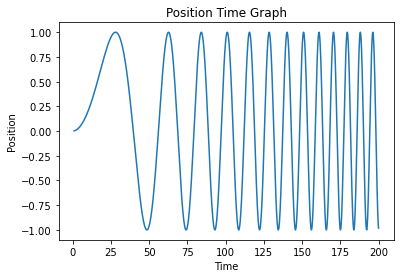

In [93]:
omega = 0.002*t
z = np.sin(t*omega)

plt.plot(t,z)
plt.title("Position Time Graph")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Amplitude')

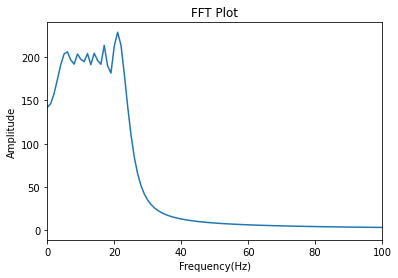

In [95]:
fft_z = np.fft.fft(z)
plt.plot(abs(fft_z))
plt.xlim(0,100)

plt.title("FFT Plot")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")